Part 1: Visualization with Matplotlib and Seaborn

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import power_transform
from mpl_toolkits.mplot3d import Axes3D

In [8]:
df = pd.read_csv('customers_dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


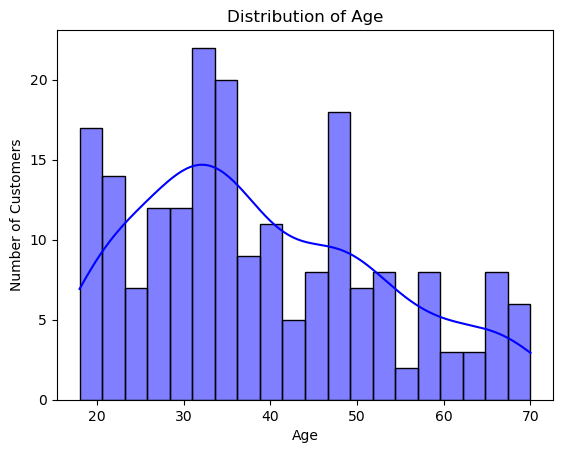

In [19]:
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.tight_layout
plt.show()

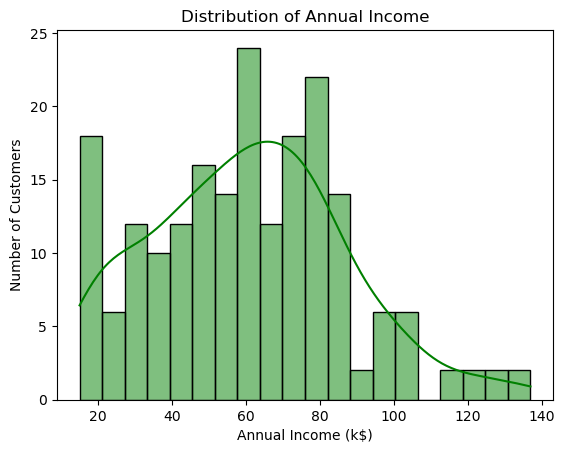

In [21]:
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.tight_layout
plt.show()

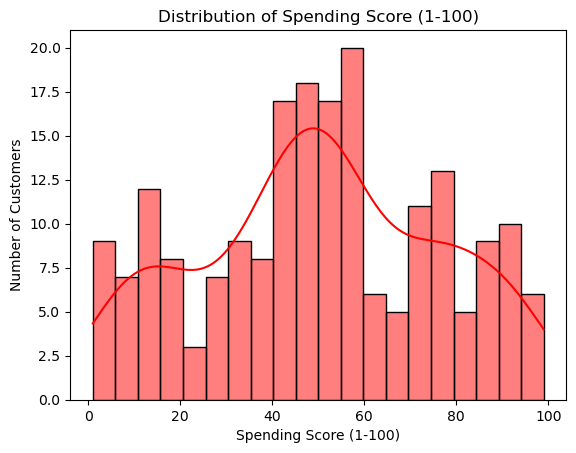

In [23]:
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.tight_layout
plt.show()

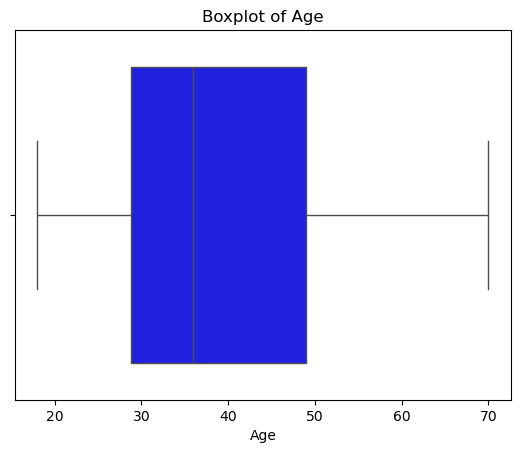

In [25]:
sns.boxplot(x=df['Age'], color = 'blue')
plt.title('Boxplot of Age')
plt.show()

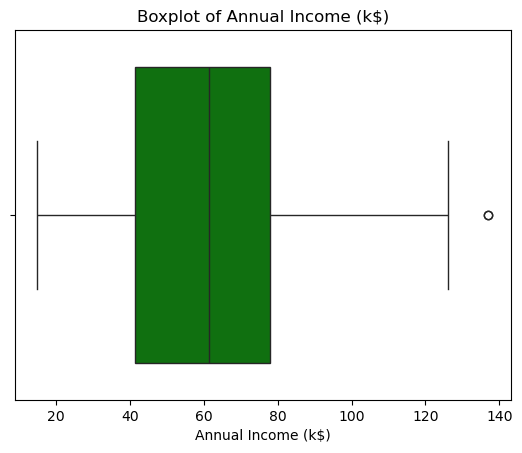

In [138]:
sns.boxplot(x=df['Annual Income (k$)'], color = 'green')
plt.title('Boxplot of Annual Income (k$)')
plt.show()

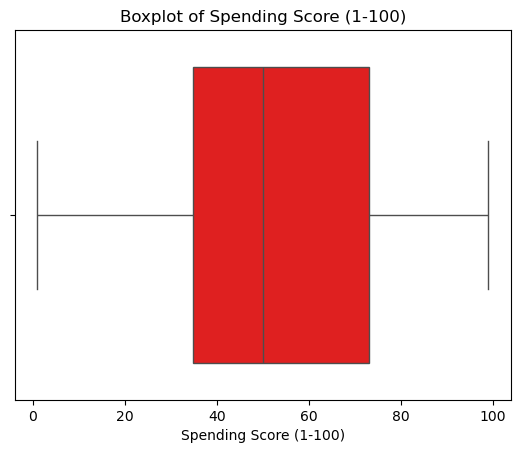

In [105]:
sns.boxplot(x=df['Spending Score (1-100)'], color = 'red')
plt.title('Boxplot of Spending Score (1-100)')
plt.show()

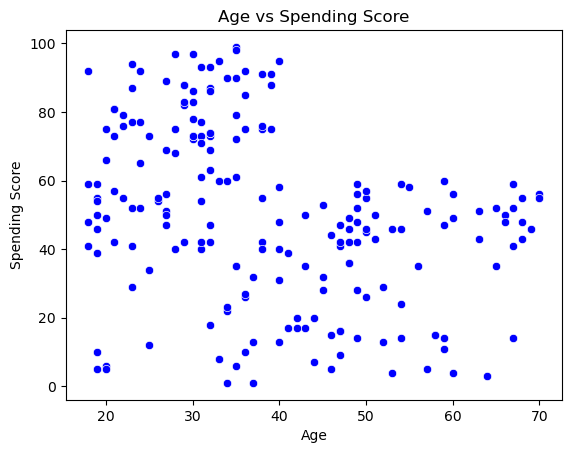

In [31]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, color='blue')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

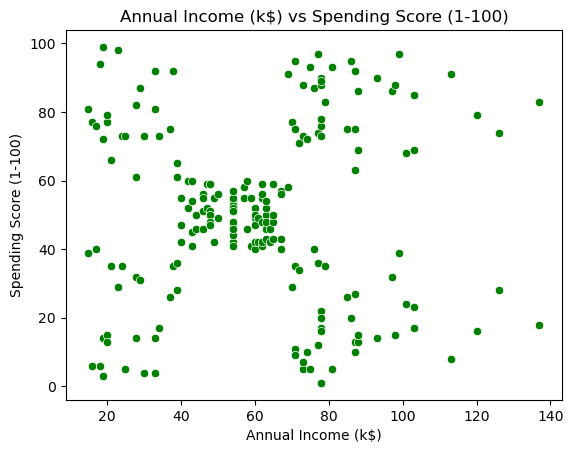

In [33]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color = 'green')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

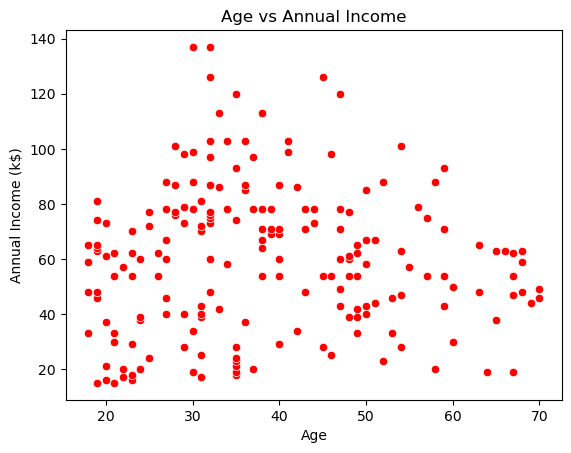

In [35]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, color='red')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

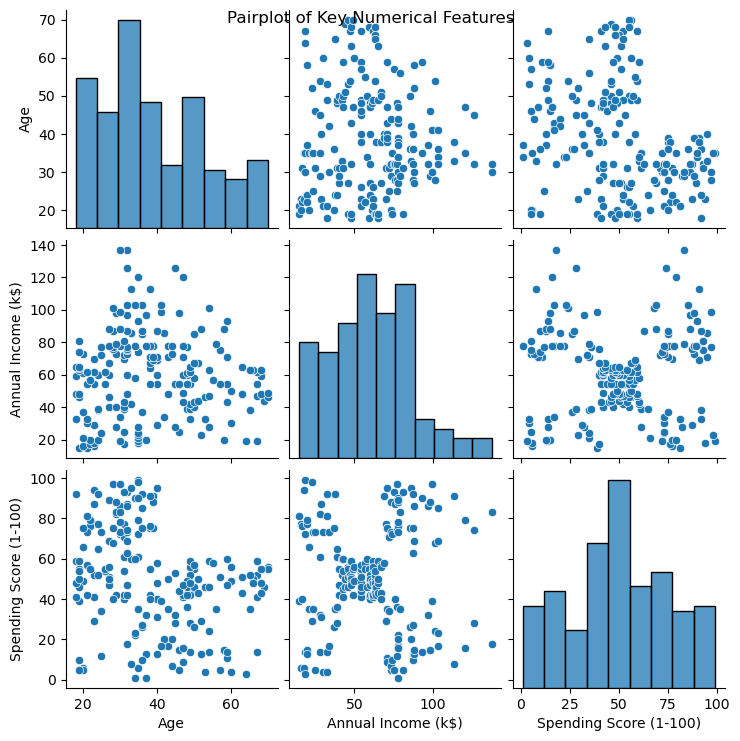

In [142]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Key Numerical Features')
plt.show()

Part 2: Skewness and Normalization

In [39]:
skew_values = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].skew()
skew_values

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Here we can see that only age and annual income are slightly right skewed and spending score is approximately normal distribution.

In [158]:
df['Age_log'] = np.log1p(df['Age'])
df['Annual_Income_log'] = np.log1p(df['Annual Income (k$)'])
df['Spending_score_log'] = np.log1p(df['Spending Score (1-100)'])

print("Before transformation skew (Age):", df['Age'].skew())
print("After transformation skew (Age_log):", df['Age_log'].skew())

print("Before transformation skew (Annual Income):", df['Annual Income (k$)'].skew())
print("After transformation skew (Annual_Income_log)", df['Annual_Income_log'].skew())

print("Before transformation skew (spending score):", df['Spending Score (1-100)'].skew())
print("After transformation skew (spending_score_log):", df['Spending_score_log'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_log): -0.0894906016890439
Before transformation skew (Annual Income): 0.3218425498619055
After transformation skew (Annual_Income_log) -0.7359971613306433
Before transformation skew (spending score): -0.047220201374263374
After transformation skew (spending_score_log): -1.5656045376436223


Applying log transform to annual income column changes its skewness to -0.7 which is more left skewed than its original skewness which is 0.32.
So Log transform is not much beneficial for annual income. For spending score also left skewness is increased so log transform not useful.
It is useful for Age column as skewness is decreased

In [144]:
scaler_std = StandardScaler()

df[['Age_std', 'Income_std','Spending_score_std']] = scaler_std.fit_transform(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])
print(df['Age'].skew())
print(df['Age_std'].skew())
print(df['Annual Income (k$)'].skew())
print(df['Income_std'].skew())
print(df['Spending Score (1-100)'].skew())
print(df['Spending_score_std'].skew())

0.48556885096681657
0.4855688509668167
0.3218425498619055
0.3218425498619062
-0.047220201374263374
-0.04722020137426279


skewness is very much same after applying standard scaler.

In [45]:
scaler_minmax = MinMaxScaler()

df[['Age_minmax', 'Income_minmax']] = scaler_minmax.fit_transform(df[['Age', 'Annual Income (k$)']])
print(df['Age'].skew())
print(df['Age_minmax'].skew())
print(df['Annual Income (k$)'].skew())
print(df['Income_minmax'].skew())

0.48556885096681657
0.4855688509668167
0.3218425498619055
0.32184254986190536


skewness is very much same after applying minmax scaler.

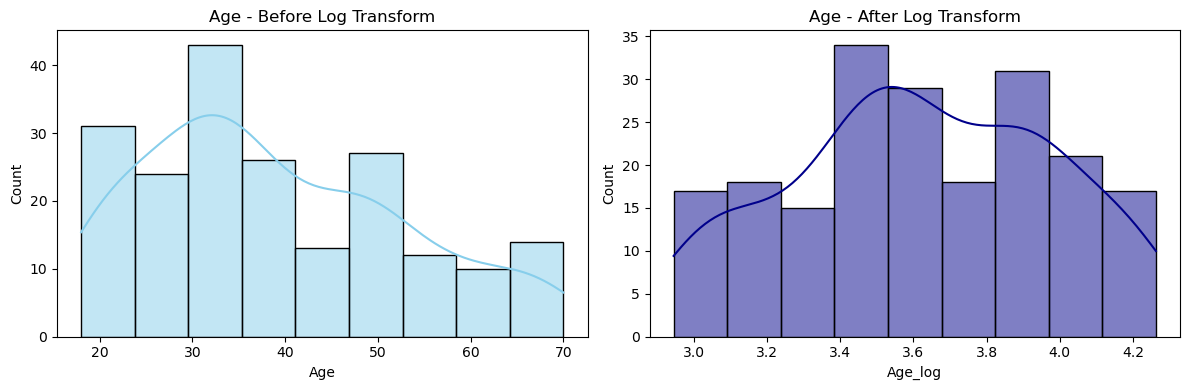

In [207]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(df['Age'], ax=ax1, kde=True, color='skyblue')
sns.histplot(df['Age_log'], ax=ax2, kde=True, color='darkblue')
ax1.set_title("Age - Before Log Transform")
ax2.set_title("Age - After Log Transform")
plt.tight_layout()
plt.show()

log transform improves skewness of Age as transformed histogram looks like normal distribution "belly curve"

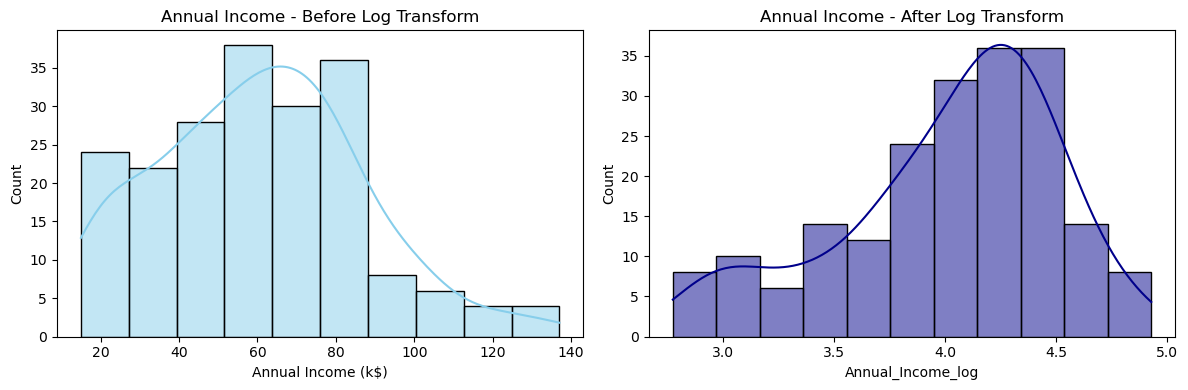

In [47]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(df['Annual Income (k$)'], ax=ax1, kde=True, color='skyblue')
sns.histplot(df['Annual_Income_log'], ax=ax2, kde=True, color='darkblue')
ax1.set_title("Annual Income - Before Log Transform")
ax2.set_title("Annual Income - After Log Transform")
plt.tight_layout()
plt.show()

It is seen that transformed histogram is left skewed with skewness -0.73 and original was right skewed with skewness 0.32.
So log transform is not useful.

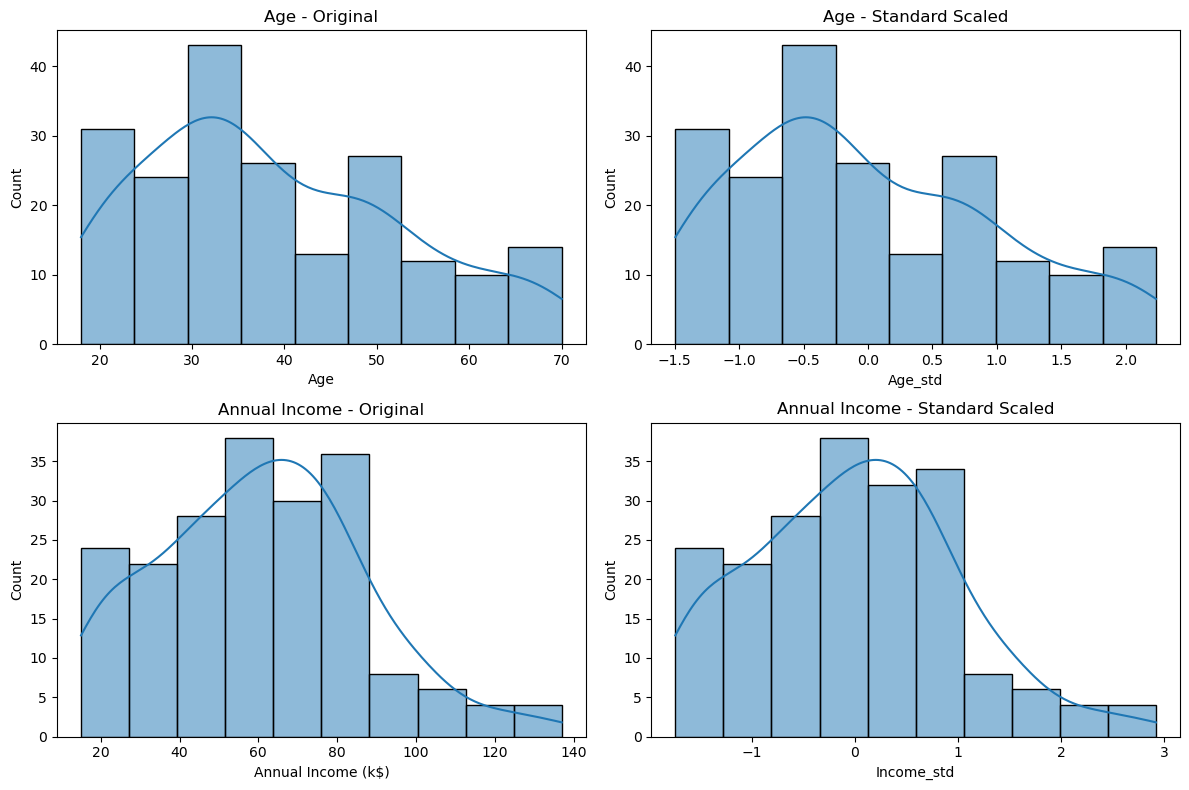

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age - Original')

sns.histplot(df['Age_std'], kde=True, ax=axes[1])
axes[1].set_title('Age - Standard Scaled')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[2])
axes[2].set_title('Annual Income - Original')

sns.histplot(df['Income_std'], kde=True, ax=axes[3])
axes[3].set_title('Annual Income - Standard Scaled')

plt.tight_layout()
plt.show()

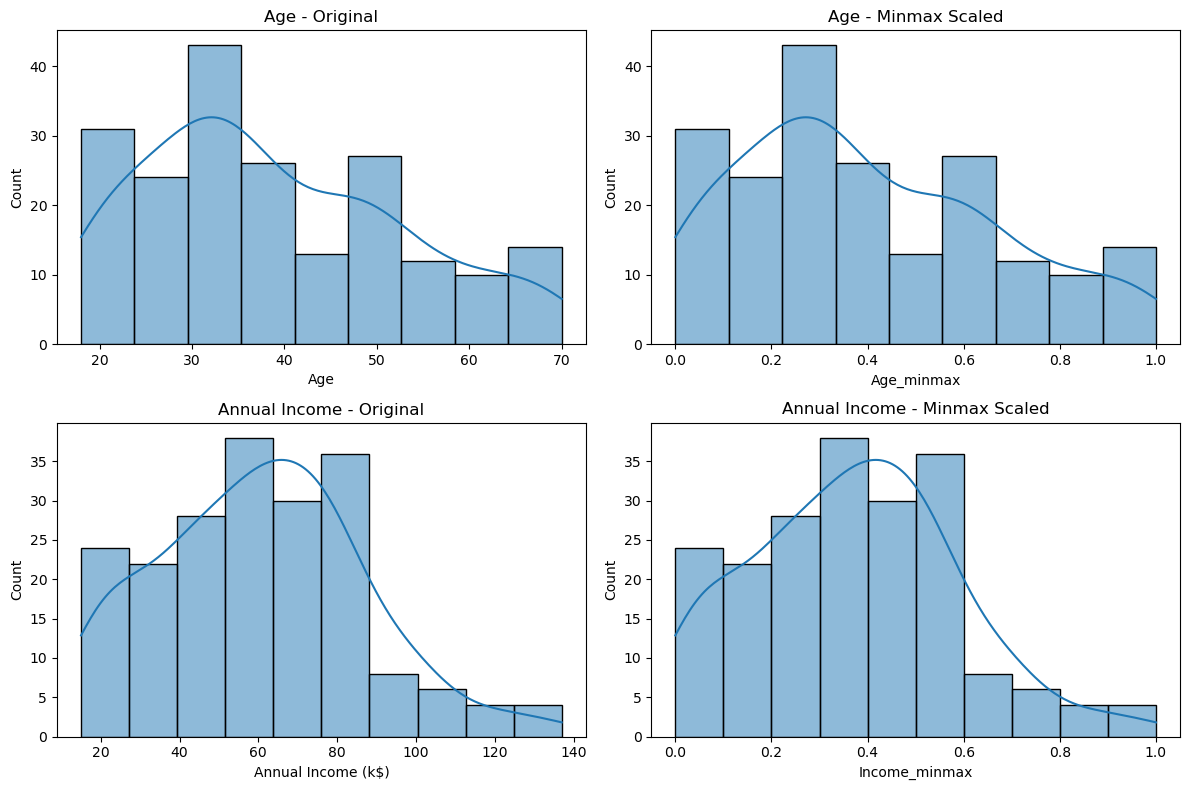

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age - Original')

sns.histplot(df['Age_minmax'], kde=True, ax=axes[1])
axes[1].set_title('Age - Minmax Scaled')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[2])
axes[2].set_title('Annual Income - Original')

sns.histplot(df['Income_minmax'], kde=True, ax=axes[3])
axes[3].set_title('Annual Income - Minmax Scaled')

plt.tight_layout()
plt.show()

it is seen that scatter scaled and minmax scaled does not improve skewness as original histogram and transfomed histogram looks similar.(long tail at right end)

In [59]:
# Mean and Standard Deviation
print(df['Age'].mean())
print(df['Annual Income (k$)'].mean())
print(df['Age_log'].mean())
print(df['Annual_Income_log'].mean())
print(df['Age_std'].mean())
print(df['Income_std'].mean())
print(df['Age_minmax'].mean())
print(df['Income_minmax'].mean())

print(df['Age'].std())
print(df['Annual Income (k$)'].std())
print(df['Age_log'].std())
print(df['Annual_Income_log'].std())
print(df['Age_std'].std())
print(df['Income_std'].std())
print(df['Age_minmax'].std())
print(df['Income_minmax'].std())

38.85
60.56
3.623080371378513
4.012388962976807
-1.021405182655144e-16
-2.1316282072803005e-16
0.40096153846153854
0.3734426229508197
13.969007331558883
26.264721165271254
0.35662930335922716
0.4951010750719503
1.002509414234171
1.0025094142341713
0.2686347563761323
0.21528459971533798


Min max scaler method transformed each feature in the range [0,1],  while standard scaler transformed mean to 0 and standard deviation to 1.

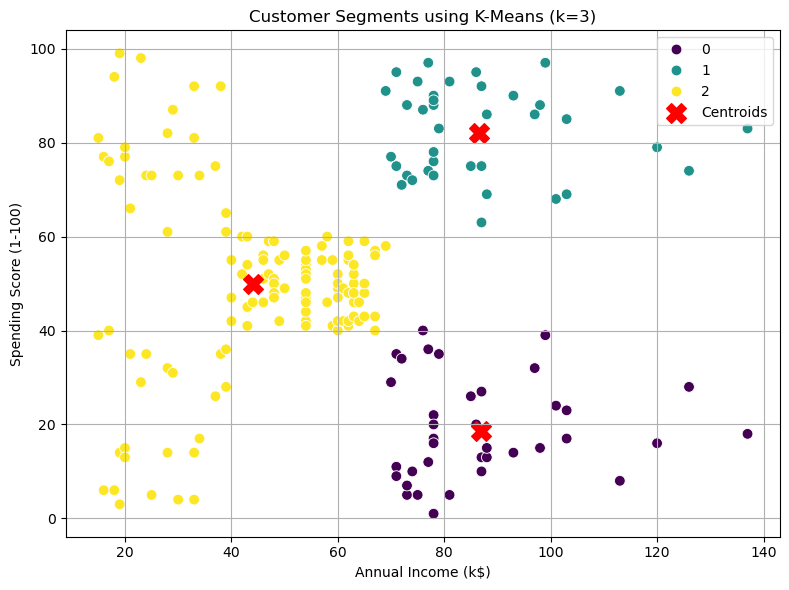

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      87.0                    18.6
1                      86.5                    82.1
2                      44.2                    49.8


In [136]:
scaler = StandardScaler()
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Customer Segments using K-Means (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))

Cluster 0 : High income, low spenders
Cluster 1 : high income, high spenders
Cluster 2 : medium income, medium spenders

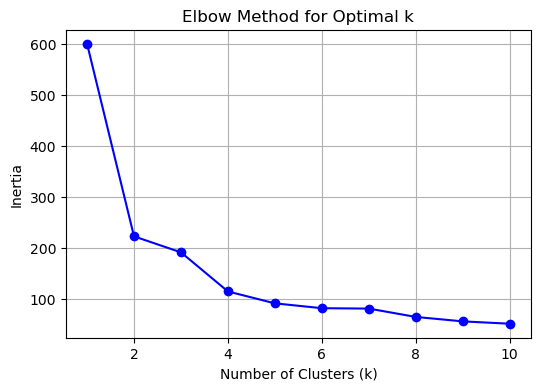

In [134]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Optimal Value of K = 4

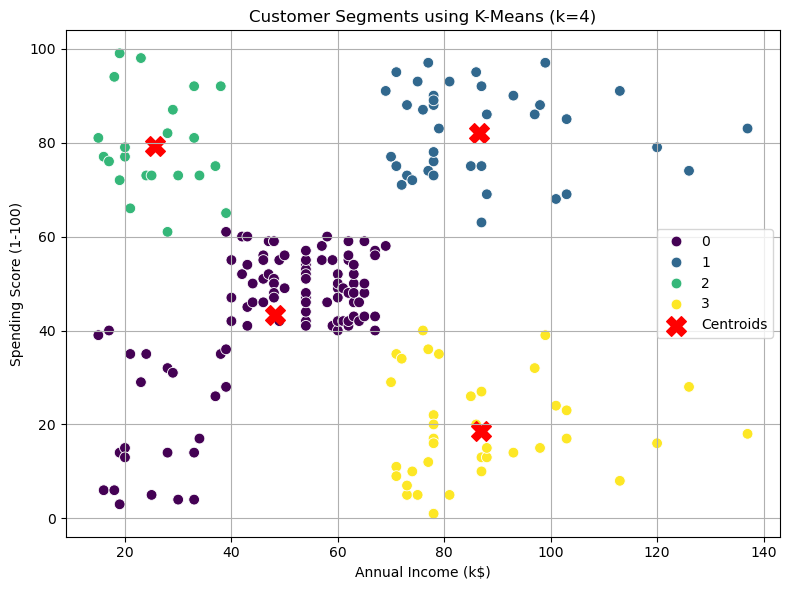

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      48.2                    43.4
1                      86.5                    82.1
2                      25.7                    79.4
3                      87.0                    18.6


In [150]:
scaler = StandardScaler()
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Customer Segments using K-Means (k=4)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))

Below are Stretch Goals

In [115]:
df['Age_sqrt'] = np.sqrt(df['Age'])
df['Annual_Income_sqrt'] = np.sqrt(df['Annual Income (k$)'])
df['spending_score_sqrt'] = np.sqrt(df['Spending Score (1-100)'])
print("Before transformation skew (Age):", df['Age'].skew())
print("After transformation skew (Age_sqrt):", df['Age_sqrt'].skew())

print("Before transformation skew (Annual Income (k$)):", df['Annual Income (k$)'].skew())
print("After transformation skew (Annual_Income_sqrt):", df['Annual_Income_sqrt'].skew())

print("Before transformation skew (spending score (1-100)):", df['Spending Score (1-100)'].skew())
print("After transformation skew (spending_score_sqrt):", df['spending_score_sqrt'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_sqrt): 0.195059160132557
Before transformation skew (Annual Income (k$)): 0.3218425498619055
After transformation skew (Annual_Income_sqrt): -0.23028952579486217
Before transformation skew (spending score (1-100)): -0.047220201374263374
After transformation skew (spending_score_sqrt): -0.7097902805855728


skewness of Age and Annual income are reduced but spending score skewness is increased by square root method

In [148]:
df['box'] = power_transform(df[['Age']], method='box-cox')
df['box1'] = power_transform(df[['Annual Income (k$)']], method='box-cox')
df['box2'] = power_transform(df[['Spending Score (1-100)']], method='box-cox')

print("Before transformation skew (Age):", df['Age'].skew())
print("After transformation skew (Age_boxcox):", df['box'].skew())

print("Before transformation skew (Income):", df['Annual Income (k$)'].skew())
print("After transformation skew (Income_boxcox):", df['box1'].skew())

print("Before transformation skew (spending score):", df['Spending Score (1-100)'].skew())
print("After transformation skew (spending score_boxcox):", df['box2'].skew())

Before transformation skew (Age): 0.48556885096681657
After transformation skew (Age_boxcox): -0.01645311664457989
Before transformation skew (Income): 0.3218425498619055
After transformation skew (Income_boxcox): -0.06640145669228836
Before transformation skew (spending score): -0.047220201374263374
After transformation skew (spending score_boxcox): -0.24384197445535652


using box-cox method, skewness of age and annual income is reduced but this is not useful for spending score. 

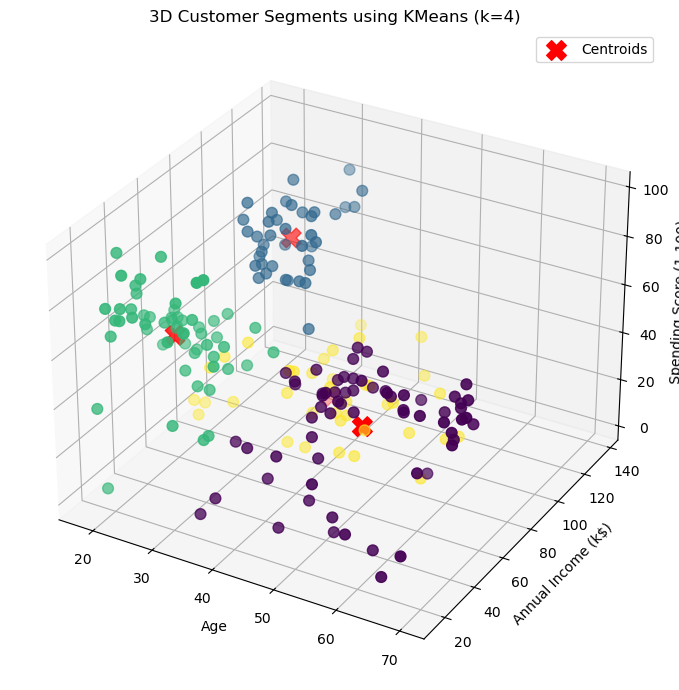

In [119]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=60
)

ax.scatter(
    centers[:, 0], centers[:, 1], centers[:, 2],
    c='red', s=200, marker='X', label='Centroids'
)

ax.set_title('3D Customer Segments using KMeans (k=4)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.tight_layout()
plt.show()

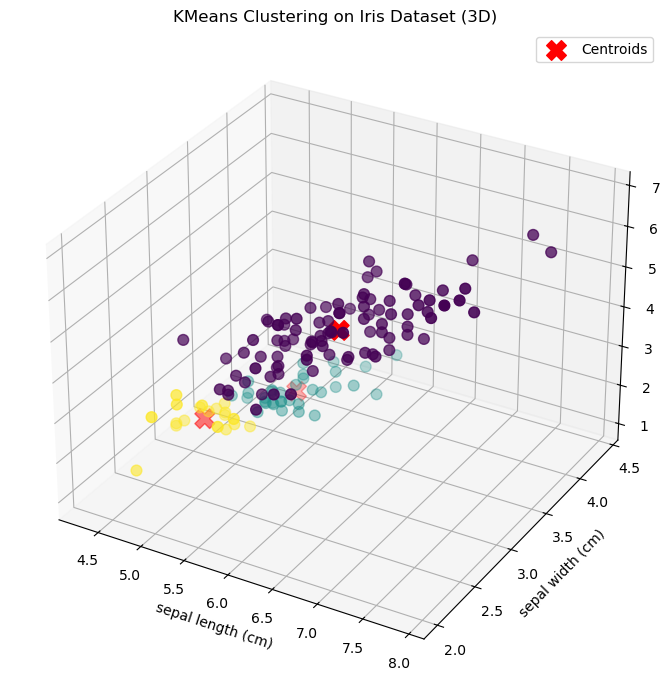

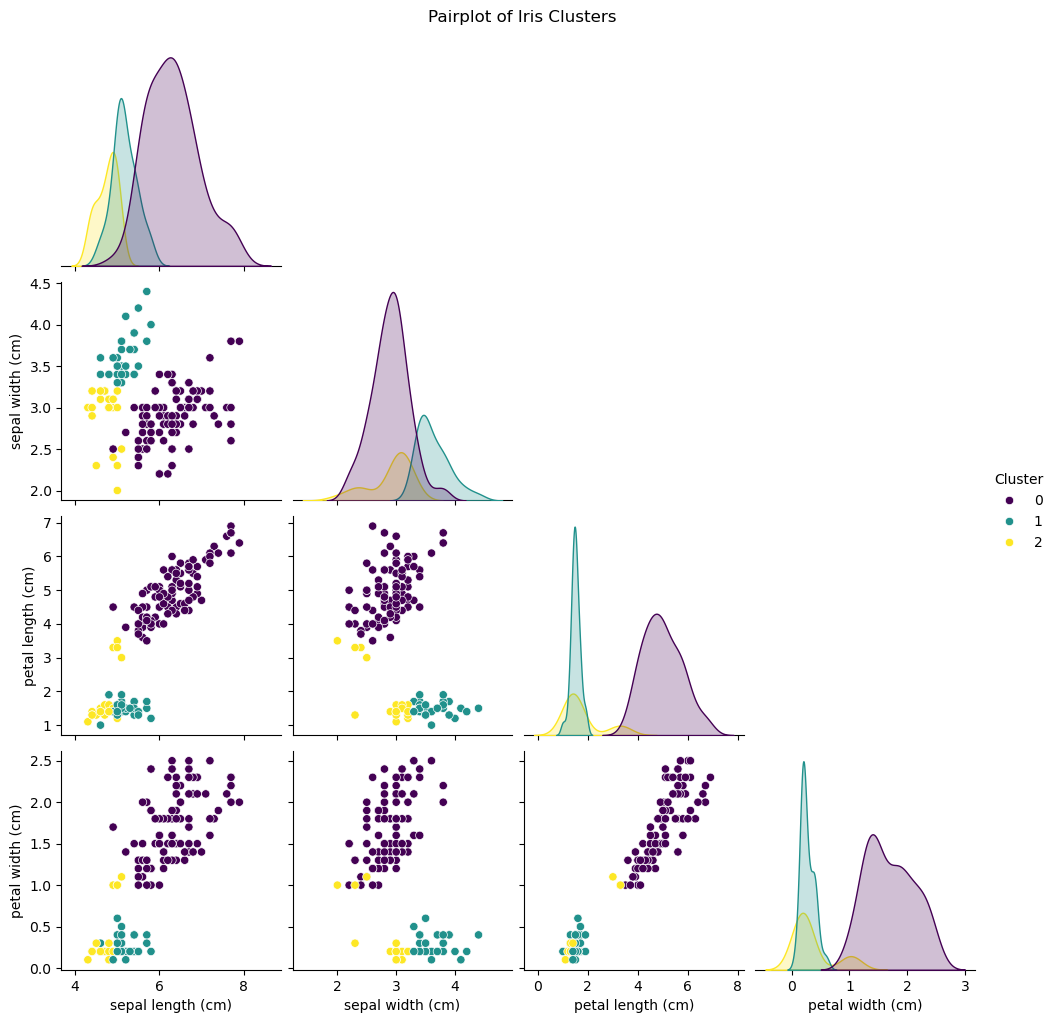

Cluster centers (original scale):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0               6.31              2.90               4.97              1.70
1               5.17              3.63               1.49              0.27
2               4.75              2.90               1.76              0.35

Cluster-wise mean features:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                     6.31              2.90               4.97   
1                     5.17              3.63               1.49   
2                     4.75              2.90               1.76   

         petal width (cm)  
Cluster                    
0                    1.70  
1                    0.27  
2                    0.35  


In [123]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X['Cluster'] = clusters


centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X[iris.feature_names[0]], X[iris.feature_names[1]], X[iris.feature_names[2]],
    c=X['Cluster'], cmap='viridis', s=60
)
ax.scatter(
    centers[:, 0], centers[:, 1], centers[:, 2],
    c='red', s=200, marker='X', label='Centroids'
)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('KMeans Clustering on Iris Dataset (3D)')
ax.legend()
plt.tight_layout()
plt.show()

sns.pairplot(X, hue='Cluster', corner=True, palette='viridis')
plt.suptitle("Pairplot of Iris Clusters", y=1.02)
plt.show()


print("Cluster centers (original scale):")
iris_centroids = pd.DataFrame(centers, columns=iris.feature_names)
print(iris_centroids.round(2))

print("\nCluster-wise mean features:")
print(X.groupby('Cluster')[iris.feature_names].mean().round(2))


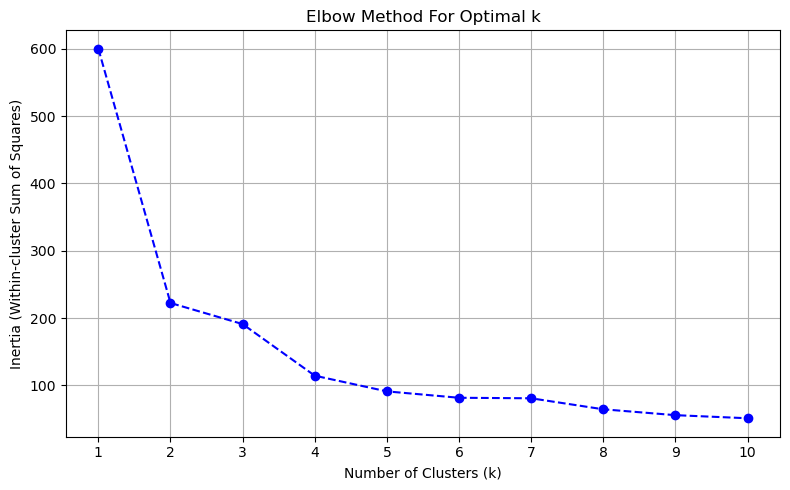

In [154]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


optimal value of clusters = 4